---
title: 'Cancer Data'
subtitle: 'Data found on kaggle.com ([here](https://www.kaggle.com/datasets/varunraskar/cancer-regression))'
---

# Modules/Libs

In [137]:
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [138]:
plt.style.use('seaborn-v0_8-darkgrid')

# Loading the Data

In [50]:
avg_hh_size = pd.read_csv('https://raw.githubusercontent.com/dan-noone/dan-noone.github.io/main/avg-household-size.csv')
avg_hh_size

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"
...,...,...,...,...
3215,56,37,2.64,"Sweetwater County, Wyoming"
3216,56,39,2.63,"Teton County, Wyoming"
3217,56,41,2.76,"Uinta County, Wyoming"
3218,56,43,2.34,"Washakie County, Wyoming"


In [51]:
avg_hh_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


In [52]:
avg_hh_size.describe(include='all')

,statefips,countyfips,avghouseholdsize,geography
count,3220.000000,3220.000000,3220.000000,3220
unique,NaN,NaN,NaN,3220
top,NaN,NaN,NaN,"Aleutians East Borough, Alaska"
freq,NaN,NaN,NaN,1
mean,31.290683,102.922050,2.540755,NaN
std,16.277207,106.693846,0.267654,NaN
min,1.000000,1.000000,1.370000,NaN
25%,19.000000,35.000000,2.380000,NaN
50%,30.000000,79.000000,2.510000,NaN
75%,46.000000,133.000000,2.650000,NaN


In [53]:
avg_hh_size.columns
# Variable Descriptions

    # statefips: The FIPS code representing the state.

    # countyfips: The FIPS code representing the county or census area within the state.

    # avghouseholdsize: The average household size in the region.

    # geography: The geographical location, typically represented as the county or census area name followed by the state name.

Index(['statefips', 'countyfips', 'avghouseholdsize', 'geography'], dtype='object')

In [74]:
can_reg = pd.read_csv('https://raw.githubusercontent.com/dan-noone/dan-noone.github.io/main/cancer_reg.csv')
can_reg = can_reg[[col for col in can_reg.columns if col != 'geography'] + ['geography']] # To move geography var to end to be able to view easier
can_reg

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,geography
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,"Kitsap County, Washington"
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,"Kittitas County, Washington"
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,"Klickitat County, Washington"
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,"Lewis County, Washington"
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,"Lincoln County, Washington"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,"Ellsworth County, Kansas"
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,"Finney County, Kansas"
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,"Ford County, Kansas"
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,"Franklin County, Kansas"


In [55]:
can_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  percentmarried           3047 non-null   float64
 13  pctnohs18_24             3047 non-null   float64
 14  pcths18_24              

In [56]:
can_reg.describe(include = 'all')

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,geography
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3047
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(54545.6, 61494.5]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kitsap County, Washington"
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,NaN,45.272333,...,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,NaN
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,NaN,45.304480,...,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,NaN
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,NaN,22.300000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,NaN
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,NaN,37.700000,...,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,NaN
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,NaN,41.000000,...,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,NaN
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,NaN,44.000000,...,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,NaN


In [57]:
can_reg.columns
# Variable Descriptions

    # avganncount: Average number of cancer cases diagnosed annually.

    # avgdeathsperyear: Average number of deaths due to cancer per year.

    # target_deathrate: Target death rate due to cancer.

    # incidencerate: Incidence rate of cancer.

    # medincome: Median income in the region.

    # popest2015: Estimated population in 2015.

    # povertypercent: Percentage of population below the poverty line.

    # studypercap: Per capita number of cancer-related clinical trials conducted.

    # binnedinc: Binned median income.

    # medianage: Median age in the region.

    # pctprivatecoveragealone: Percentage of population covered by private health insurance alone.

    # pctempprivcoverage: Percentage of population covered by employee-provided private health insurance.

    # pctpubliccoverage: Percentage of population covered by public health insurance.

    # pctpubliccoveragealone: Percentage of population covered by public health insurance only.

    # pctwhite: Percentage of White population.

    # pctblack: Percentage of Black population.

    # pctasian: Percentage of Asian population.

    # pctotherrace: Percentage of population belonging to other races.

    # pctmarriedhouseholds: Percentage of married households.

    # birthrate: Birth rate in the region.

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'percentmarried',
       'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24',
       'pcths25_over', 'pctbachdeg25_over', 'pctemployed16_over',
       'pctunemployed16_over', 'pctprivatecoverage', 'pctprivatecoveragealone',
       'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone',
       'pctwhite', 'pctblack', 'pctasian', 'pctotherrace',
       'pctmarriedhouseholds', 'birthrate', 'geography'],
      dtype='object')

# Data Transformation / Wrangling

## Normalizing the geographic locations

In [58]:
# Below I normalized the geographic locations since there are a number of them that are in avg_hh_size, but not in can_reg
  # So below I have filtered the avg_hh_size df to only include those in the can_reg df, so that any analyses are going off of the same number of observations

In [59]:
can_reg_locs = can_reg['geography']
can_reg_locs

0          Kitsap County, Washington
1        Kittitas County, Washington
2       Klickitat County, Washington
3           Lewis County, Washington
4         Lincoln County, Washington
                    ...             
3042        Ellsworth County, Kansas
3043           Finney County, Kansas
3044             Ford County, Kansas
3045         Franklin County, Kansas
3046            Geary County, Kansas
Name: geography, Length: 3047, dtype: object

In [60]:
avg_hh_size['geography']

0           Aleutians East Borough, Alaska
1       Aleutians West Census Area, Alaska
2           Anchorage Municipality, Alaska
3               Bethel Census Area, Alaska
4              Bristol Bay Borough, Alaska
                       ...                
3215            Sweetwater County, Wyoming
3216                 Teton County, Wyoming
3217                 Uinta County, Wyoming
3218              Washakie County, Wyoming
3219                Weston County, Wyoming
Name: geography, Length: 3220, dtype: object

In [61]:
geo_cond = avg_hh_size['geography'].isin(can_reg_locs)
avg_hh_size_adj = avg_hh_size[geo_cond]
avg_hh_size_adj['geography'].nunique() # Now have done this to normalize

3047

## Splitting the geography variable in each df

In [62]:
# Within each df there is a variable `geography`, which is a combination of county and state, separated by a comma
  # If I want to do any county/state level analyses independently, this format is not great
    # So I have split this var in each df to create two separate `state` and `county` variables

In [63]:
avg_hh_size_adj = (
    avg_hh_size_adj
    .assign(
        county = lambda x: x['geography'].str.split(', ').str[0],
        state = lambda x: x['geography'].str.split(', ').str[1]
    )
    .drop(columns = 'geography')
)

avg_hh_size_adj.sort_values(['state','county'])

,statefips,countyfips,avghouseholdsize,county,state
29,1,1,2.68,Autauga County,Alabama
30,1,3,2.60,Baldwin County,Alabama
31,1,5,2.61,Barbour County,Alabama
32,1,7,2.95,Bibb County,Alabama
33,1,9,2.74,Blount County,Alabama
...,...,...,...,...,...
3215,56,37,2.64,Sweetwater County,Wyoming
3216,56,39,2.63,Teton County,Wyoming
3217,56,41,2.76,Uinta County,Wyoming
3218,56,43,2.34,Washakie County,Wyoming


In [64]:
can_reg_adj = (
    can_reg
    .assign(
        county = lambda x: x['geography'].str.split(', ').str[0],
        state = lambda x: x['geography'].str.split(', ').str[1] # Had an issue with merging at first since I failed to put a space after the comma here as I did in the adj above.
    )
    .drop(columns = 'geography')
)

can_reg_adj.sort_values(['state','county'])

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,county,state
500,266.0,99,178.3,475.0,54366,55347,13.1,0.000000,"(51046.4, 54545.6]",37.7,...,30.0,14.3,77.399902,18.679488,0.967023,0.925373,56.069818,5.872131,Autauga County,Alabama
501,1072.0,424,174.3,454.6,49626,203709,13.0,14.726890,"(48021.6, 51046.4]",42.2,...,33.7,17.5,86.431496,9.601734,0.669841,0.958380,53.935010,5.381478,Baldwin County,Alabama
1007,155.0,62,192.7,477.5,34971,26489,25.4,0.000000,"(34218.1, 37413.8]",38.8,...,46.6,26.5,47.363731,46.765929,0.905985,3.445715,43.276946,6.266977,Barbour County,Alabama
1416,125.0,53,212.4,494.6,39546,22583,18.1,929.903024,"(37413.8, 40362.7]",38.9,...,39.4,22.7,76.654574,21.438683,0.092904,0.030968,57.335990,4.179861,Bibb County,Alabama
2684,291.0,120,175.4,429.9,45567,57673,17.5,0.000000,"(45201, 48021.6]",40.7,...,35.9,19.0,95.097903,1.531797,0.143823,0.961705,59.439854,6.894123,Blount County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,155.0,49,141.1,403.5,72604,44626,9.8,0.000000,"(61494.5, 125635]",33.6,...,21.9,11.3,92.133476,0.866613,0.857679,1.684088,54.385755,8.929776,Sweetwater County,Wyoming
1190,83.0,23,136.9,402.7,75348,23125,7.7,0.000000,"(61494.5, 125635]",38.0,...,14.4,5.5,93.160325,0.322711,1.900408,2.783380,50.580188,1.745232,Teton County,Wyoming
1191,68.0,24,132.8,359.3,56800,20822,10.0,0.000000,"(54545.6, 61494.5]",34.6,...,24.4,13.0,94.233158,0.195891,0.119446,1.538462,57.451346,6.918372,Uinta County,Wyoming
1192,50.0,21,182.3,448.0,50802,8328,12.6,0.000000,"(48021.6, 51046.4]",43.4,...,32.2,13.9,91.238095,0.678571,0.166667,4.142857,51.708428,5.370370,Washakie County,Wyoming


## Merging the two DFs together

In [65]:
# These two dfs have two key variables now, 'state', and 'county'
  # Using these two keys, a merge can now be performed

In [66]:
can_reg_adj['county'].value_counts().to_frame()

,count
county,
Washington County,30
Jefferson County,25
Lincoln County,23
Franklin County,23
Jackson County,21
...,...
Amelia County,1
Albemarle County,1
Accomack County,1


In [67]:
avg_hh_size_adj['county'].value_counts().to_frame()

,count
county,
Washington County,30
Jefferson County,25
Lincoln County,23
Franklin County,23
Jackson County,21
...,...
Winn Parish,1
West Feliciana Parish,1
West Carroll Parish,1


In [68]:
can_reg_w_avg_hh_size = can_reg_adj.merge(avg_hh_size_adj, on = ['county', 'state'], how = 'left')
can_reg_w_avg_hh_size # This is now the aggregate data frame of both the two obtained from the kaggle page
# The only difference now is that the cancer data includes average household size per each geographic area now, allowing for analyses to be made with that variable as well

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,county,state,statefips,countyfips,avghouseholdsize
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,2.594728,4.821857,1.843479,52.856076,6.118831,Kitsap County,Washington,53,35,2.54
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,0.969102,2.246233,3.741352,45.372500,4.333096,Kittitas County,Washington,53,37,2.34
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,0.739673,0.465898,2.747358,54.444868,3.729488,Klickitat County,Washington,53,39,2.62
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,0.782626,1.161359,1.362643,51.021514,4.603841,Lewis County,Washington,53,41,2.52
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,0.270192,0.665830,0.492135,54.027460,6.796657,Lincoln County,Washington,53,43,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,3.837754,0.327613,1.700468,51.063830,7.773512,Ellsworth County,Kansas,20,53,2.08
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,2.326771,4.044920,14.130288,52.007937,8.186470,Finney County,Kansas,20,55,2.90
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,2.313188,1.316472,5.680705,55.153949,7.809192,Ford County,Kansas,20,57,3.04
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,1.176562,0.244632,2.131790,58.484232,7.582938,Franklin County,Kansas,20,59,2.56


# General Analyses

## Summary Statistics

In [69]:
num_only = can_reg_w_avg_hh_size.select_dtypes(exclude = 'object') # Separation of DF by data type
nonnum_only = can_reg_w_avg_hh_size.select_dtypes(include = 'object')
num_only_first17 = num_only.iloc[:, 0:17]
num_only_last17 = num_only.iloc[:, 17:] # Done to allow the pandas DF to fully display the summary stats

### Numeric Variables Only
- Separated into two DFs with 17 variables each

In [70]:
num_only_first17.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000


In [71]:
num_only_last17.describe()

,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
count,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,30.272071,101.802429,2.529682
std,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,15.054873,104.315612,0.248449
min,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,1.000000,1.000000,1.860000
25%,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,19.000000,35.000000,2.380000
50%,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,29.000000,79.000000,2.500000
75%,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,45.000000,133.000000,2.640000
max,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,56.000000,840.000000,3.970000


### Non-Numeric Variables Only

In [73]:
nonnum_only.describe()

,binnedinc,county,state
count,3047,3047,3047
unique,10,1819,51
top,"(54545.6, 61494.5]",Washington County,Texas
freq,306,30,233


## Frequency of Each State in the Data Frame

In [121]:
states = (
    nonnum_only
    .groupby('state')
    .agg(
        n = ('state', 'size')
    )
    .sort_values('n', ascending = True)
)

states_order = states.index

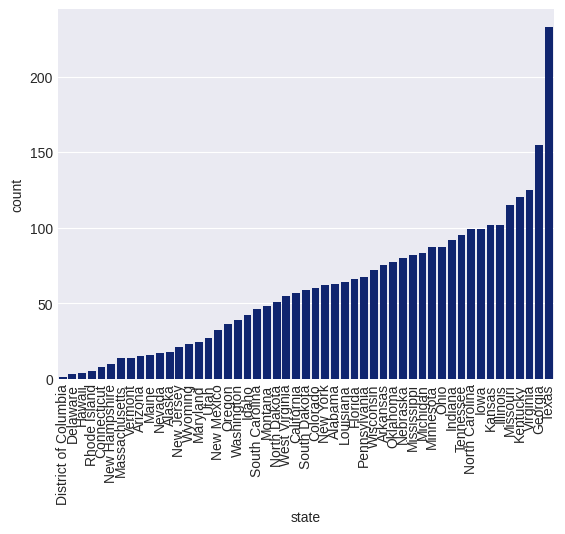

<Figure size 1000x5000 with 0 Axes>

In [141]:
sns.countplot(data = nonnum_only,
              x = 'state',
              order = states_order)
plt.xticks(rotation = 90)
plt.figure(figsize = (10, 50))
plt.show()